# **Project 3**

Name: Arun Sangar

Due Date: 16 May 2019

Course: CPSC 483

---



**Pre-Processing**
---

In [62]:
import numpy as np
import pylab as plt
import pandas as pd
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# bank.csv from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv('bank.csv', sep=';')

# Ordinal features
#
# Note: month probably shouldn't be ordinal.
# Then again, neither should day.

boolean = { 'no': 0.0, 'yes': 1.0 }
months = {
    'jan': 1.0, 'feb': 2.0, 'mar': 3.0, 'apr': 4.0,  'may': 5.0,  'jun': 6.0,
    'jul': 7.0, 'aug': 8.0, 'sep': 9.0, 'oct': 10.0, 'nov': 11.0, 'dec': 12.0
}

bank.replace({
    'default': boolean,
    'housing': boolean,
    'loan':    boolean,
    'month':   months,
    'y':       boolean
}, inplace=True)

# Categorical features
#
# Since we plan to use logistic regression, add drop_first=True
# to use dummy instead of one-hot encoding

categorical = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pd.get_dummies(bank, columns=categorical, prefix=categorical, drop_first=True)

# Numeric features
#
# Standardized because we plan to use KNN and SVM 

scaled = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
bank[scaled] = sklearn.preprocessing.scale(bank[scaled].astype(float))

# Training set and targets

X = bank.drop(columns='y').values
t = bank['y'].values

#split data into training and test sets for cross validation

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)

 **Gaussian Naive Bayes**
---



In [63]:
gnb = GaussianNB().fit(X_train, t_train)

gnbp = gnb.predict(X_test)
gnbs = gnb.score(X_test, t_test)

print('Gaussian Naive Bayes Score: ', gnbs)
print('Confusion Matrix: \n', confusion_matrix(gnbp, t_test))

Gaussian Naive Bayes Score:  0.8397790055248618
Confusion Matrix: 
 [[712  49]
 [ 96  48]]


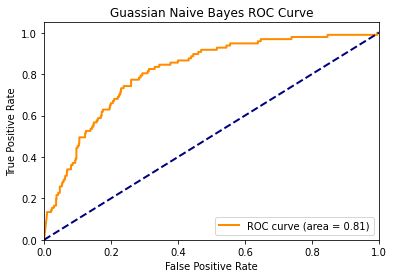

AUC Score:  0.8122639583545983


In [64]:
gnbp_prob = gnb.predict_proba(X_test)[:,1]
gnb_fpr, gnb_tpr, _ = roc_curve(t_test, gnbp_prob)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

plt.figure()
plt.plot(gnb_fpr, gnb_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Guassian Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, gnbp_prob))

**Logistic Regression**
---



In [65]:
lr = LogisticRegression(fit_intercept = False, solver = 'lbfgs').fit(X_train, t_train)

lrp = lr.predict(X_test)
lrs = lr.score(X_test, t_test)

print('Logistic Regression Score: ', lrs)
print('Confusion Matrix: \n', confusion_matrix(lrp, t_test))

Logistic Regression Score:  0.9082872928176795
Confusion Matrix: 
 [[790  65]
 [ 18  32]]


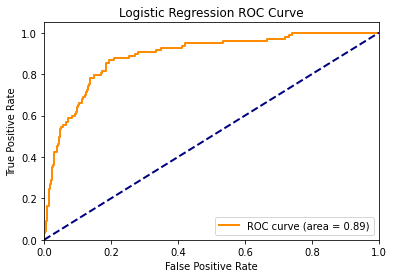

AUC Score:  0.8868276002858018


In [66]:
lrp_prob = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(t_test, lrp_prob)
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.figure()
plt.plot(lr_fpr, lr_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, lrp_prob))

**Support Vector Machine**
---



In [67]:
svml = SVC(kernel='linear', gamma = 'auto', probability = True).fit(X_train, t_train)
svmp = SVC(kernel='poly', gamma = 'auto', probability = True).fit(X_train, t_train)
svmr = SVC(kernel='rbf', gamma = 'auto', probability = True).fit(X_train, t_train)
svms = SVC(kernel='sigmoid', gamma = 'auto', probability = True).fit(X_train, t_train)

svmlp = svml.predict(X_test)
svmpp = svmp.predict(X_test)
svmrp = svmr.predict(X_test)
svmsp = svms.predict(X_test)

svmls = svml.score(X_test, t_test)
svmps = svmp.score(X_test, t_test)
svmrs = svmr.score(X_test, t_test)
svmss = svms.score(X_test, t_test)

print('SVM Linear Score: ', svmls)
print('Confusion Matrix: \n', confusion_matrix(svmlp, t_test), '\n')

print('SVM Polynomial Score: ', svmps)
print('Confusion Matrix: \n', confusion_matrix(svmpp, t_test), '\n')

print('SVM RBF Score: ', svmrs)
print('Confusion Matrix: \n', confusion_matrix(svmrp, t_test), '\n')

print('SVM Sigmoid Score: ', svmss)
print('Confusion Matrix: \n', confusion_matrix(svmsp, t_test), '\n')

SVM Linear Score:  0.8994475138121547
Confusion Matrix: 
 [[801  84]
 [  7  13]] 

SVM Polynomial Score:  0.8939226519337017
Confusion Matrix: 
 [[806  94]
 [  2   3]] 

SVM RBF Score:  0.9005524861878453
Confusion Matrix: 
 [[798  80]
 [ 10  17]] 

SVM Sigmoid Score:  0.8806629834254144
Confusion Matrix: 
 [[775  75]
 [ 33  22]] 



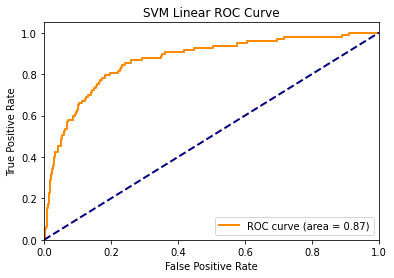

AUC Score:  0.8670511381035011


In [68]:
svmlp_prob = svml.predict_proba(X_test)[:,1]
svml_fpr, svml_tpr, _ = roc_curve(t_test, svmlp_prob)
svml_roc_auc = auc(svml_fpr, svml_tpr)

plt.figure()
plt.plot(svml_fpr, svml_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % svml_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Linear ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, svmlp_prob))

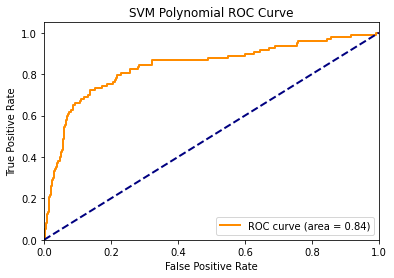

AUC Score:  0.8369781565785445


In [69]:
svmpp_prob = svmp.predict_proba(X_test)[:,1]
svmp_fpr, svmp_tpr, _ = roc_curve(t_test, svmpp_prob)
svmp_roc_auc = auc(svmp_fpr, svmp_tpr)

plt.figure()
plt.plot(svmp_fpr, svmp_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % svmp_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Polynomial ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, svmpp_prob))

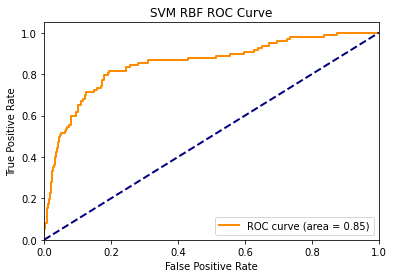

AUC Score:  0.8505792589568235


In [70]:
svmrp_prob = svmr.predict_proba(X_test)[:,1]
svmr_fpr, svmr_tpr, _ = roc_curve(t_test, svmrp_prob)
svmr_roc_auc = auc(svmr_fpr, svmr_tpr)

plt.figure()
plt.plot(svmr_fpr, svmr_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % svmr_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM RBF ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, svmrp_prob))

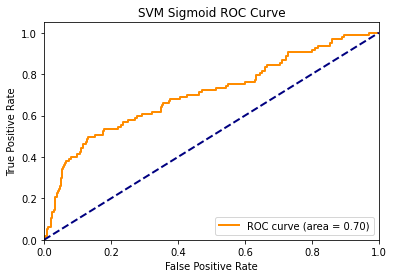

AUC Score:  0.7045779320200062


In [71]:
svmsp_prob = svms.predict_proba(X_test)[:,1]
svms_fpr, svms_tpr, _ = roc_curve(t_test, svmsp_prob)
svms_roc_auc = auc(svms_fpr, svms_tpr)

plt.figure()
plt.plot(svms_fpr, svms_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % svms_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Sigmoid ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, svmsp_prob))

**Assumption**
---

In [72]:
counter_zero = 0
counter_one = 0

for i in t_train:
  if i == 0: counter_zero += 1
  if i == 1: counter_one += 1
  
print('Size of training set: ', len(t_train))
print('Number of 0\'s in training set: ', counter_zero)
print('Number of 1\'s in training set: ', counter_one)
print('Accuracy of all zero predictions: ', counter_zero / len(t_train))

Size of training set:  3616
Number of 0's in training set:  3192
Number of 1's in training set:  424
Accuracy of all zero predictions:  0.8827433628318584


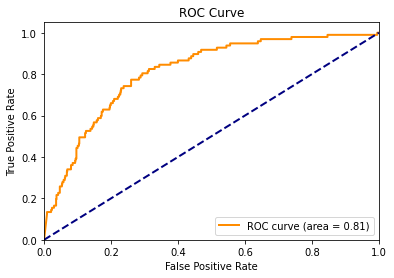

AUC Score:  0.8122639583545983


In [73]:
zero_test = np.full(len(t_test),0)

zp_prob = gnb.predict_proba(X_test)[:,1]
z_fpr, z_tpr, _ = roc_curve(t_test, zp_prob)
z_roc_auc = auc(z_fpr, z_tpr)

plt.figure()
plt.plot(z_fpr, z_tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % z_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score: ", roc_auc_score(t_test, zp_prob))